#Prepare Environment

FLACS sorts cell at a per celll level

In [ ]:
DIRPATH_SDS = '/content/SimulateDSorting'

import os
if os.path.exists(DIRPATH_SDS):
  !rm -rf {DIRPATH_SDS}

In [ ]:
if not os.path.exists(DIRPATH_SDS):
  !git clone https://github.com/Herais/SimulateDSorting.git
  !chmod +x {DIRPATH_SDS}/setup_environment.sh
  os.chdir(DIRPATH_SDS)
  !{DIRPATH_SDS}/setup_environment.sh
  
!git pull https://github.com/Herais/SimulateDSorting.git

In [ ]:
!git stash

Saved working directory and index state WIP on main: 41857f9 updated data


In [ ]:
#Load Global Libraries
import os
import sys
import shutil
import itertools

import flowkit as fk

import bokeh
from bokeh.plotting import figure, output_file, save
from bokeh.models import *
from bokeh.plotting import show
from bokeh.layouts import gridplot
from bokeh.layouts import row
from bokeh.models import Range1d
import matplotlib.pyplot as plt
from bokeh.io import export_png

import numpy as np
import pandas as pd
import math
import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from scipy.signal import find_peaks

import re

rng = np.random.default_rng(seed=None)

bokeh.io.output_notebook()
%matplotlib inline
%load_ext autoreload

print('flowkit verion: ', fk.__version__)
print('bokeh version: ', bokeh.__version__)
print('pandas verion: ', pd.__version__)

flowkit verion:  1.0.1
bokeh version:  2.4.3
pandas verion:  1.5.3


In [ ]:
# Load Local Libraries
os.chdir("{}/module".format(DIRPATH_SDS))

%autoreload 2

from Data import FlowData as fld
from Tools import Droplet as dp
from FACS import Flowcytometry as flc
from Dsort import DropletSorter as dsorter

In [ ]:
#del fld, dp, flc

# Prepare flowcytometry data for sampling

In [ ]:
# Define Directory path for Flow data
DIRPATH_FLOWDATA = "/content/flowdata"

# Delect DIRPATH_FLOWDATA if it exists to start clean
!rm -rf {DIRPATH_FLOWDATA}

In [ ]:
# Download from shared googledrive link
import gdown
import os

# download zipped file
# id_folder is the from the link of the Google Drive Shared Folder
# the fcs files are already unzipped in the folder
id_folder = "19MeVT4zKAsTtGdLwQjj6xBtj59Q9x2No"

gdown.download_folder(id=id_folder, output=DIRPATH_FLOWDATA, quiet=True)

['/content/flowdata/AKH_VX_20230328_library_isolates_A1_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_A6_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_B3_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_B5_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_C3_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_C4_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_D1_MAIPTG.fcs',
 '/content/flowdata/AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs',
 '/content/flowdata/AKH_VX_

In [ ]:
# create fcs folder if it does not exist (fcs folder)
if not os.path.exists("{}/fcs".format(DIRPATH_FLOWDATA)):
  os.mkdir("{}/fcs".format(DIRPATH_FLOWDATA))

# create gts folder if it does not exist (gating strategy folder)
if not os.path.exists("{}/gts".format(DIRPATH_FLOWDATA)):
  os.mkdir("{}/gts".format(DIRPATH_FLOWDATA))

# copy all downloaded fcs file to the ./fcs folder
ls_fn = [fn for fn in os.listdir(DIRPATH_FLOWDATA) if '.fcs' in fn]
[shutil.copy("{}/{}".format(DIRPATH_FLOWDATA , fn) , "{}/fcs/{}".format(DIRPATH_FLOWDATA , fn) ) for fn in ls_fn]

['/content/flowdata/fcs/AKH_VX_20230328_library_isolates_F2_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_D1_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_test_Sample.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_A6_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_C3_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_B3_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_C4_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_library_isolates_G3_MAIPTG.fcs',
 '/content/flowdata/fcs/AKH_VX_20230328_libr

In [ ]:
#del SS

In [ ]:
# Instantiate a new session SS

# Alternatively, use the following code, assuming gating_strategy=None.
# This code uses filename as sample_id
SS = fk.Session()
for fn in ls_fn:
  sample_tmp = fk.Sample("{}/{}".format(DIRPATH_FLOWDATA , fn), cache_original_events=True)
  sample_tmp.id = fn
  SS.add_samples(sample_tmp)
del sample_tmp


In [ ]:
# define transformations \
wspb_xform = fk.transforms.WSPBiexTransform("wspb")
logicle_xform = fk.transforms.LogicleTransform('logicle', param_t=262144, param_w=0.5, param_m=4.5, param_a=0)

In [ ]:
ls_woz = [sid for sid in SS.get_sample_ids() if re.search('[0-9]_MAIPTG.fcs', sid)]
ls_wz = [sid for sid in SS.get_sample_ids() if re.search('[0-9]_MAIPTGZ.fcs', sid)]
print(ls_woz, '\n', ls_wz)

colname_f1 = 'mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

dfc_woz = fld.combine_flowcytometry_records(SS, ls_woz, source='raw')
dfc_woz[colname_f1_xform_logicle] = logicle_xform.apply(dfc_woz[colname_f1])

dfc_wz = fld.combine_flowcytometry_records(SS, ls_wz, source='raw')
dfc_wz[colname_f1_xform_logicle] = logicle_xform.apply(dfc_wz[colname_f1])

['AKH_VX_20230328_library_isolates_F2_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_D1_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_A6_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_C3_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_B3_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_C4_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_G3_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_G2_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_E4_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_A1_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_D5_MAIPTG.fcs', 'AKH_VX_20230328_library_isolates_B5_MAIPTG.fcs'] 
 ['AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs', 'AKH_VX_20230328_library_isolates_E4_MA

In [ ]:
dfl_woz = fld.combine_flowcytometry_records(SS, ['AKH_VX_20230328_library_isolates_library_MAIPTG.fcs'], source='raw')
dfl_wz = fld.combine_flowcytometry_records(SS, ['AKH_VX_20230328_library_isolates_library_MAIPTGZ.fcs'], source='raw')

# Full dataset analysis

## Z- Pooled strains 

peak_x: 0.06285198013960502, width: 0.013215200895324991, # strains present: 12, # events: 219786
peak_x: 0.15535838640687993, width: 0.013215200895324991, # strains present: 12, # events: 203284
peak_x: 0.24786479267415484, width: 0.013215200895324991, # strains present: 12, # events: 177596
peak_x: 0.3205483975984423, width: 0.013215200895324991, # strains present: 12, # events: 152459
peak_x: 0.4262700047610422, width: 0.013215200895324991, # strains present: 12, # events: 97821
peak_x: 0.5319916119236421, width: 0.013215200895324991, # strains present: 12, # events: 48845
peak_x: 0.624498018190917, width: 0.013215200895324991, # strains present: 12, # events: 22421
peak_x: 0.7103968240105294, width: 0.013215200895324991, # strains present: 12, # events: 8899
peak_x: 0.7896880293824795, width: 0.013215200895324991, # strains present: 12, # events: 2615
quantile 0.99: 0.8055203596058731, width: 0.2947248908167437, # strains present: 11, # events: 2257


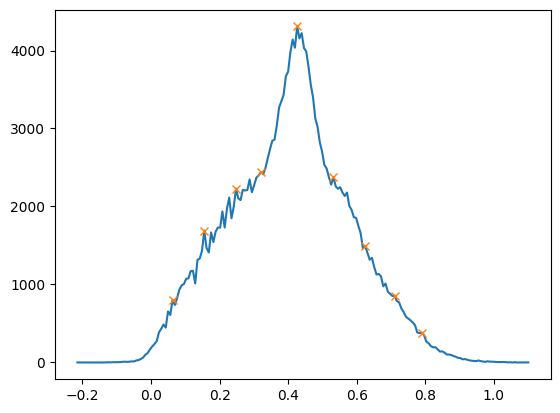

In [ ]:
df = dfc_woz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

peak_x: 0.17423293169847925, width: 0.0143222079168872, # strains present: 1, # events: 5846
quantile 0.99: 0.5428242610707344, width: 0.590996601059187, # strains present: 1, # events: 130


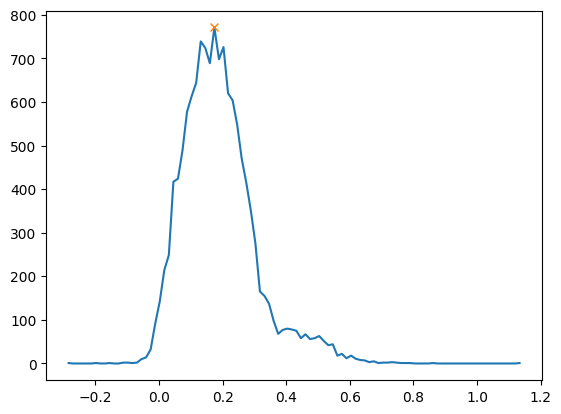

In [ ]:
df = dfl_woz
colname_f1='mCherry-A'
colname_f1_xform= 'xform_logicle_{}'.format(colname_f1)
df[colname_f1_xform] = logicle_xform.apply(df[colname_f1])

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=100,
    distance=5,
    height=250,
    above_quantile=0.99)

## Z+ Pooled strains 

peak_x: 0.06391084567663363, width: 0.01566451839335056, # strains present: 12, # events: 189237
peak_x: 0.15006569684006177, width: 0.01566451839335056, # strains present: 12, # events: 156755
peak_x: 0.2283882888068145, width: 0.01566451839335056, # strains present: 12, # events: 125713
peak_x: 0.30671088077356734, width: 0.01566451839335056, # strains present: 12, # events: 98776
peak_x: 0.44769154631372243, width: 0.01566451839335056, # strains present: 12, # events: 64065
peak_x: 0.5416786566738258, width: 0.01566451839335056, # strains present: 12, # events: 46508
peak_x: 0.6513302854272797, width: 0.01566451839335056, # strains present: 12, # events: 30605
peak_x: 0.7374851365907077, width: 0.01566451839335056, # strains present: 12, # events: 18355
peak_x: 0.8471367653441616, width: 0.01566451839335056, # strains present: 11, # events: 4761
quantile 0.99: 0.9025806152906577, width: 0.1951884443471128, # strains present: 10, # events: 2049


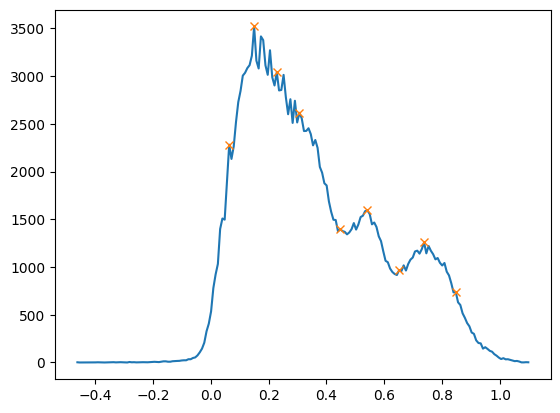

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

peak_x: 0.15548114551937858, width: 0.009327866527329413, # strains present: 1, # events: 8025
peak_x: 0.21611227794701976, width: 0.009327866527329413, # strains present: 1, # events: 5664
quantile 0.99: 0.630424106556457, width: 0.2293109617762923, # strains present: 1, # events: 123


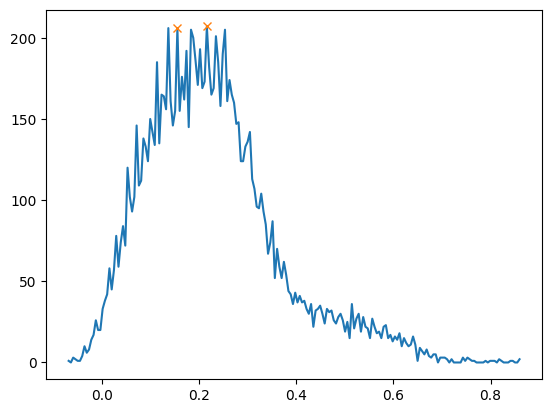

In [ ]:
df = dfl_wz
colname_f1='mCherry-A'
colname_f1_xform= 'xform_logicle_{}'.format(colname_f1)
df[colname_f1_xform] = logicle_xform.apply(df[colname_f1])

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

# Simulated Analysis - Cells

## FACS only

### (1) proportional strain abundance

In [ ]:
# Generate and assign proportional abundances to the pooled strains
tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=None) #, strain2P=strain2P)
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']).sort_index())

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.058587
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.060906
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.069998
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.107345
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.106003
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.060827
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.065645
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.071638
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.056879
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.058748
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.213450
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.069974
dtype: float64


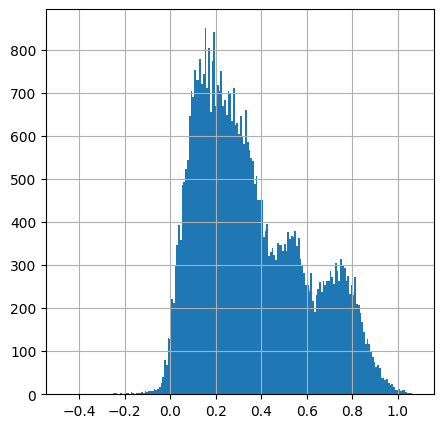

In [ ]:
# assign random abundance to strains in the collections
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)


ret_facs_01 = flc.analyze(
    df=df,
    n_rounds=50000,
    colname_f1=colname_f1_xform_logicle,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    replace=False,
    bins=200,
    figsize=(5,5),
    )


In [ ]:
ret_facs_01['df'].groupby('sid')['sid'].count()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs     2934
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs     3048
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs     3478
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs     5332
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs     5335
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs     3059
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs     3391
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs     3575
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs     2941
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs     2923
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    10516
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs     3468
Name: sid, dtype: int64

peak_x: 0.043451963340909394, width: 0.015475269958017672, # strains present: 12, # events: 47565
peak_x: 0.159516488026042, width: 0.015475269958017672, # strains present: 12, # events: 37465
peak_x: 0.28331864769018333, width: 0.015475269958017672, # strains present: 12, # events: 26176
peak_x: 0.3839079024172982, width: 0.015475269958017672, # strains present: 12, # events: 18768
peak_x: 0.4767595221654043, width: 0.015475269958017672, # strains present: 12, # events: 14403
peak_x: 0.5541358719554925, width: 0.015475269958017672, # strains present: 12, # events: 10850
peak_x: 0.677938031619634, width: 0.015475269958017672, # strains present: 12, # events: 6666
peak_x: 0.7553143814097223, width: 0.015475269958017672, # strains present: 12, # events: 3860
quantile 0.99: 0.9023175241211179, width: 0.17797752640697562, # strains present: 7, # events: 500


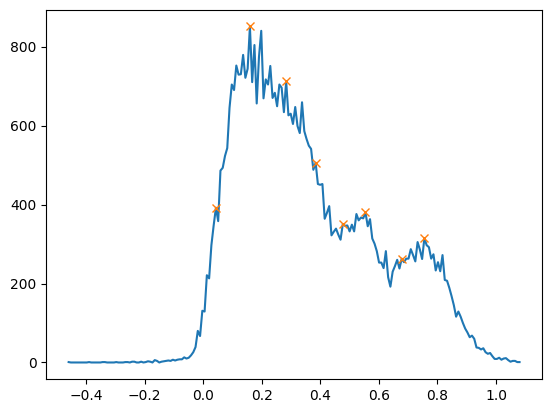

In [ ]:
df = ret_facs_01['df']
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

### (2) equal strain abundance

In [ ]:
abundances_equal = [1/len(ls_wz)]*len(ls_wz)
strain2P = dict(zip(ls_wz, abundances_equal))

tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=strain2P) #, strain2P=strain2P)
# assign random abundance to strains in the collections
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']).sort_index())

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.083333
dtype: float64


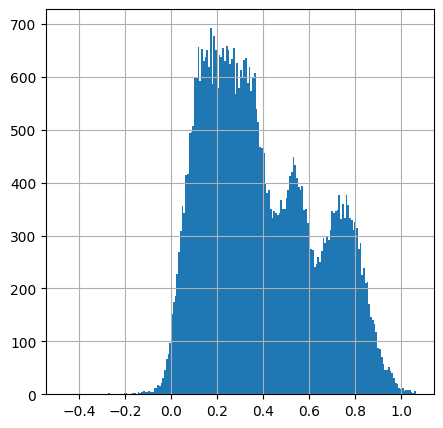

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform = 'xform_logicle_{}'.format(colname_f1)

ret_facs_02 = flc.analyze(
    df=df,
    n_rounds=50000,
    colname_f1=colname_f1_xform,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    replace=False,
    bins=200,
    figsize=(5,5),
    )

In [ ]:
ret_facs_02['df'].groupby('sid')['sid'].count()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    3983
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    4033
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    4033
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    4459
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    4389
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    3991
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    4123
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    4076
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    3957
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    4101
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    4656
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    4199
Name: sid, dtype: int64

peak_x: 0.05362732381734758, width: 0.01531939026738298, # strains present: 12, # events: 47523
peak_x: 0.17618244595641142, width: 0.01531939026738298, # strains present: 12, # events: 38284
peak_x: 0.27575848269440073, width: 0.01531939026738298, # strains present: 12, # events: 30028
peak_x: 0.3676748242986986, width: 0.01531939026738298, # strains present: 12, # events: 22818
peak_x: 0.45193147076930495, width: 0.01531939026738298, # strains present: 12, # events: 18376
peak_x: 0.5361881172399114, width: 0.01531939026738298, # strains present: 12, # events: 14156
peak_x: 0.6817223247800497, width: 0.01531939026738298, # strains present: 12, # events: 8275
peak_x: 0.7659789712506562, width: 0.01531939026738298, # strains present: 12, # events: 4446
peak_x: 0.8425759225875711, width: 0.01531939026738298, # strains present: 10, # events: 1598
quantile 0.99: 0.911962207925488, width: 0.15274487353913624, # strains present: 8, # events: 500


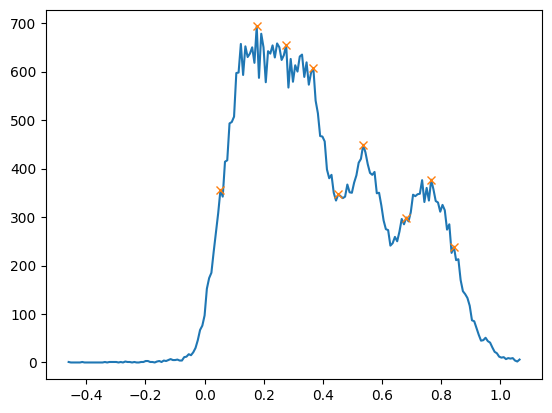

In [ ]:
df = ret_facs_02['df']
colname_f1='mCherry-A'
colname_f1_xform = 'xform_logicle_{}'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform_logicle,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

###(3) random strain abundance

In [ ]:
# Generate random abundance and assign to df
#abundances_random = fld.generate_abuduance(a=3, scale=10, size=len(ls_wz))
abundances_random = [0.06016566, 0.02113162, 0.04187348, 0.26106276, 0.10405436, 0.04489549,
                     0.04325233, 0.03035451, 0.06089064, 0.11688058, 0.08055852, 0.13488005]
strain2P_random = dict(zip(ls_wz, abundances_random))

In [ ]:
tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=strain2P_random) #, strain2P=strain2P)
# assign random abundance to strains in the collections
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']).sort_index())

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.041873
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.021132
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.043252
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.044895
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.104054
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.116881
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.134880
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.060166
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.030355
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.261063
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.060891
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.080559
dtype: float64


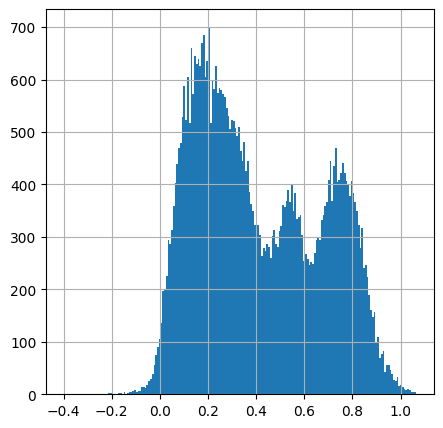

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_facs_03 = flc.analyze(
    df=df,
    n_rounds=50000,
    colname_f1=colname_f1_xform_logicle,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    replace=False,
    bins=200,
    figsize=(5,5),
    )

In [ ]:
ret_facs_03['df'].groupby('sid')['sid'].count()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    2883
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    7418
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    5372
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    2238
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    3141
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    5277
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs     786
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    4537
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    4012
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    6392
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    5922
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    2022
Name: sid, dtype: int64

peak_x: 2432.1400000000003, width: 5146.76, # strains present: 12, # events: 13421
peak_x: 51326.36, width: 5146.76, # strains present: 8, # events: 2136
peak_x: 77060.16, width: 5146.76, # strains present: 7, # events: 1085
quantile 0.99: 121090.66000000013, width: 388297.33999999985, # strains present: 6, # events: 500


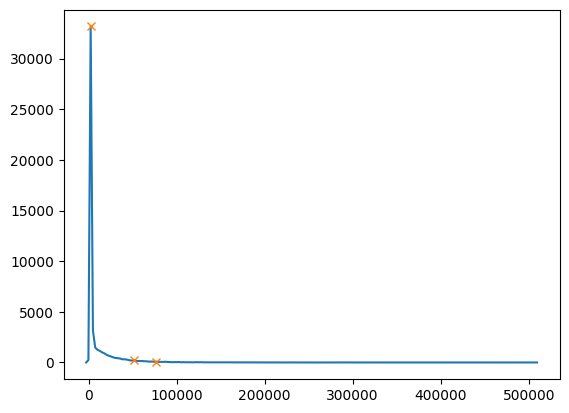

peak_x: 0.03972725322069509, width: 0.014634358226870479, # strains present: 12, # events: 48115
peak_x: 0.13485058169535324, width: 0.014634358226870479, # strains present: 12, # events: 41658
peak_x: 0.2080223728297056, width: 0.014634358226870479, # strains present: 12, # events: 35309
peak_x: 0.3031457013043637, width: 0.014634358226870479, # strains present: 12, # events: 28002
peak_x: 0.4129033880058923, width: 0.014634358226870479, # strains present: 12, # events: 21887
peak_x: 0.5519297911611618, width: 0.014634358226870479, # strains present: 12, # events: 15837
peak_x: 0.6616874778626906, width: 0.014634358226870479, # strains present: 12, # events: 11452
peak_x: 0.7348592689970429, width: 0.014634358226870479, # strains present: 12, # events: 7523
peak_x: 0.8446169556985715, width: 0.014634358226870479, # strains present: 8, # events: 1982
peak_x: 0.9324231050597943, width: 0.014634358226870479, # strains present: 6, # events: 380
quantile 0.99: 0.9254144137375915, width: 0.

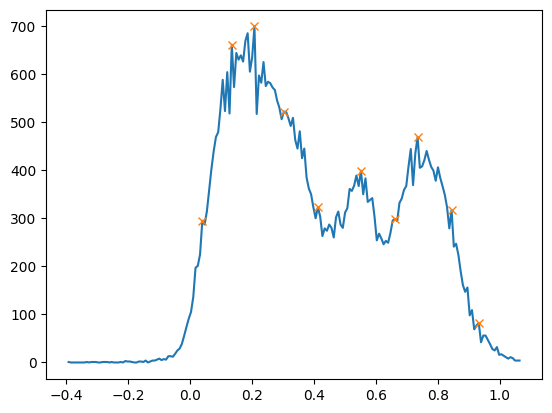

In [ ]:
df = ret_facs_03['df']
colname_f1='mCherry-A'
colname_f1_xform = 'xform_logicle_{}'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

In [ ]:
# Sanity Check
# the sum of P_sid shall equal to 1
check_P_sampling_sid = fld.assign_sampling_probability(
    dfc_wz, strain2P=strain2P)['df'][['sid', 'P_sampling_sid']]. \
    drop_duplicates(keep='first')['P_sampling_sid'].sum()
print(check_P_sampling_sid)
check_P_sampling_index = fld.assign_sampling_probability(dfc_wz)['df']['P_sampling_index'].sum()
print(check_P_sampling_index)

0.9999999999999999
1.0000000000000004


## Droplet Culture + Droplet FACS

### (1) =proportional abundance, =droplet_size, =num_cells_encapsulated 

In [ ]:
# Generate proportional abundance and assign to df
tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=None) #, strain2P=strain2P)
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']))

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.058587
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.060906
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.069998
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.107345
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.106003
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.060827
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.065645
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.071638
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.056879
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.058748
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.213450
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.069974
dtype: float64


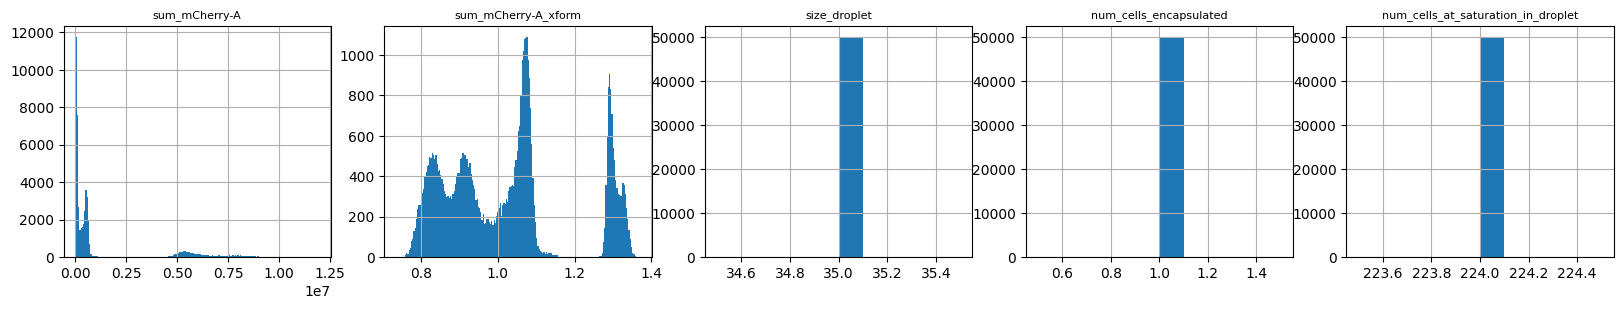

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_01 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

In [ ]:
ret_dcds_01['df'].groupby('sid')['sid'].count()

sid
(AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs,)     3020
(AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs,)     3051
(AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs,)     3517
(AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs,)     5387
(AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs,)     5315
(AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs,)     3035
(AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs,)     3321
(AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs,)     3533
(AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs,)     2773
(AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs,)     2967
(AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs,)    10617
(AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs,)     3464
Name: sid, dtype: int64

peak_x: 579472.65, width: 112213.53, # strains present: 9, # events: 11473
peak_x: 5348547.675, width: 112213.53, # strains present: 3, # events: 6537
quantile 0.99: 8686206.230000002, width: 2553551.7699999977, # strains present: 1, # events: 500


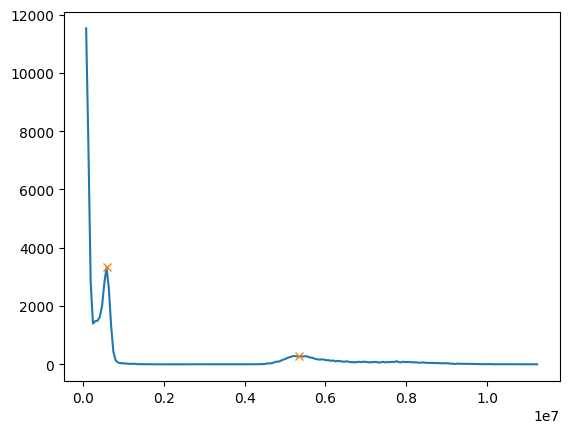

peak_x: 0.8298873032804945, width: 0.006196122951924433, # strains present: 12, # events: 43870
peak_x: 0.8608679180401168, width: 0.006196122951924433, # strains present: 12, # events: 39841
peak_x: 0.9104369016555122, width: 0.006196122951924433, # strains present: 12, # events: 33727
peak_x: 0.9445155778910965, width: 0.006196122951924433, # strains present: 12, # events: 29532
peak_x: 1.0281632377420764, width: 0.006196122951924433, # strains present: 11, # events: 23599
peak_x: 1.0746341598815097, width: 0.006196122951924433, # strains present: 9, # events: 13708
peak_x: 1.294596524674827, width: 0.006196122951924433, # strains present: 3, # events: 5125
peak_x: 1.3286752009104115, width: 0.006196122951924433, # strains present: 2, # events: 1024
quantile 0.99: 1.3378809714348823, width: 0.024872905711113447, # strains present: 1, # events: 500


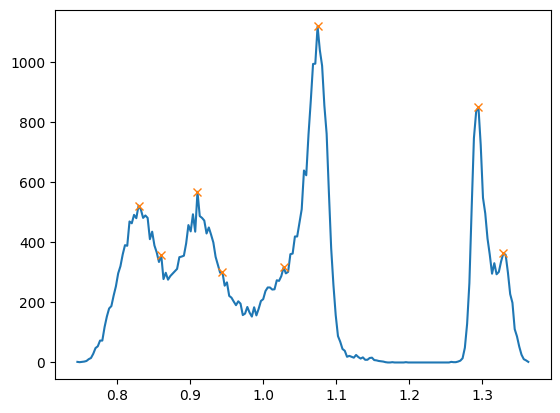

In [ ]:
df = ret_dcds_01['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=ret_dcds_01['df'],
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=5,
    height=200,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=ret_dcds_01['df'],
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=200,
    above_quantile=0.99)

####(1.1.1) ~droplet_size, scale=0.1

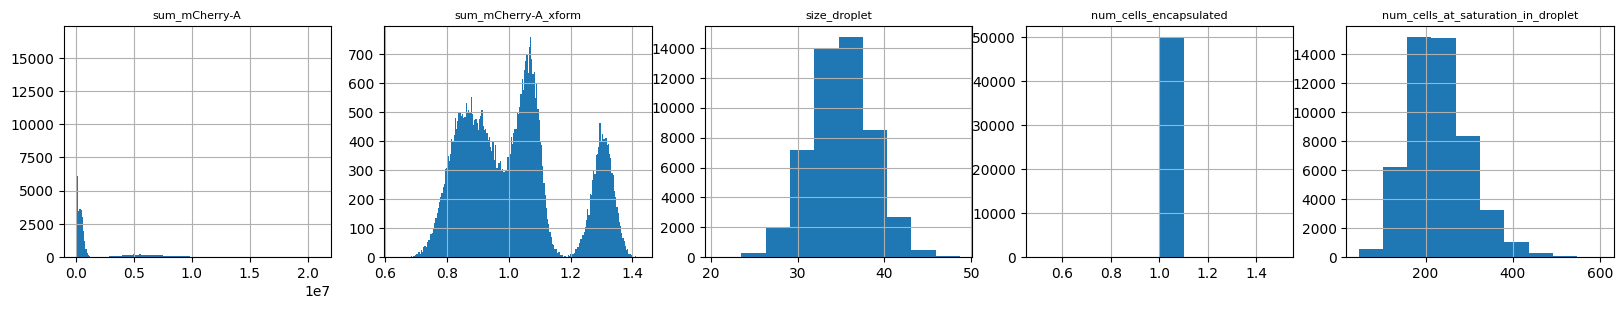

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0111 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.1,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 424771.44, width: 209293.72, # strains present: 11, # events: 16757
peak_x: 3564177.24, width: 209293.72, # strains present: 3, # events: 8550
peak_x: 4610645.84, width: 209293.72, # strains present: 3, # events: 7175
peak_x: 5657114.44, width: 209293.72, # strains present: 3, # events: 5300
peak_x: 6703583.04, width: 209293.72, # strains present: 3, # events: 3624
peak_x: 8063992.22, width: 209293.72, # strains present: 3, # events: 1936
peak_x: 9319754.540000001, width: 209293.72, # strains present: 3, # events: 1012
quantile 0.99: 10690644.92000001, width: 10244911.07999999, # strains present: 3, # events: 500


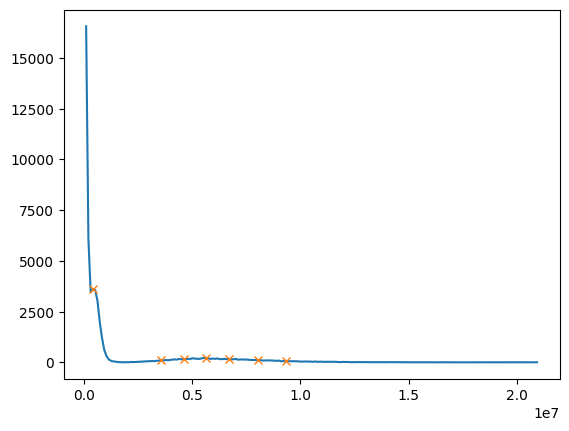

peak_x: 0.7429762044697791, width: 0.007859034139807377, # strains present: 12, # events: 49601
peak_x: 0.8412141312173713, width: 0.007859034139807377, # strains present: 12, # events: 42378
peak_x: 0.8805093019164081, width: 0.007859034139807377, # strains present: 12, # events: 37350
peak_x: 0.9276635067552523, width: 0.007859034139807377, # strains present: 12, # events: 31802
peak_x: 0.9748177115940966, width: 0.007859034139807377, # strains present: 12, # events: 27545
peak_x: 1.0298309505727483, width: 0.007859034139807377, # strains present: 11, # events: 22177
peak_x: 1.073055638341689, width: 0.007859034139807377, # strains present: 9, # events: 15070
peak_x: 1.2577429406271623, width: 0.007859034139807377, # strains present: 3, # events: 8271
peak_x: 1.297038111326199, width: 0.007859034139807377, # strains present: 3, # events: 5030
quantile 0.99: 1.3579198160994026, width: 0.06486284146371446, # strains present: 3, # events: 500


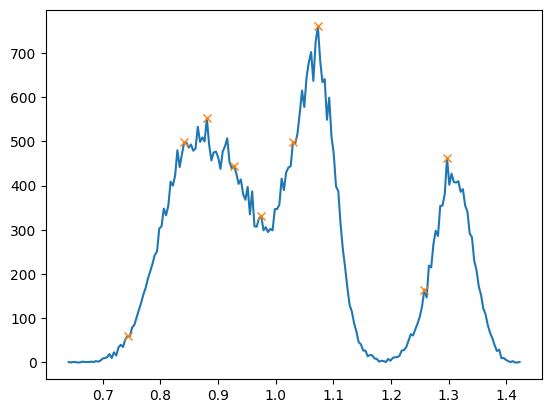

In [ ]:
df = ret_dcds_0111['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.1.2) ~ droplet_size, scale=0.2

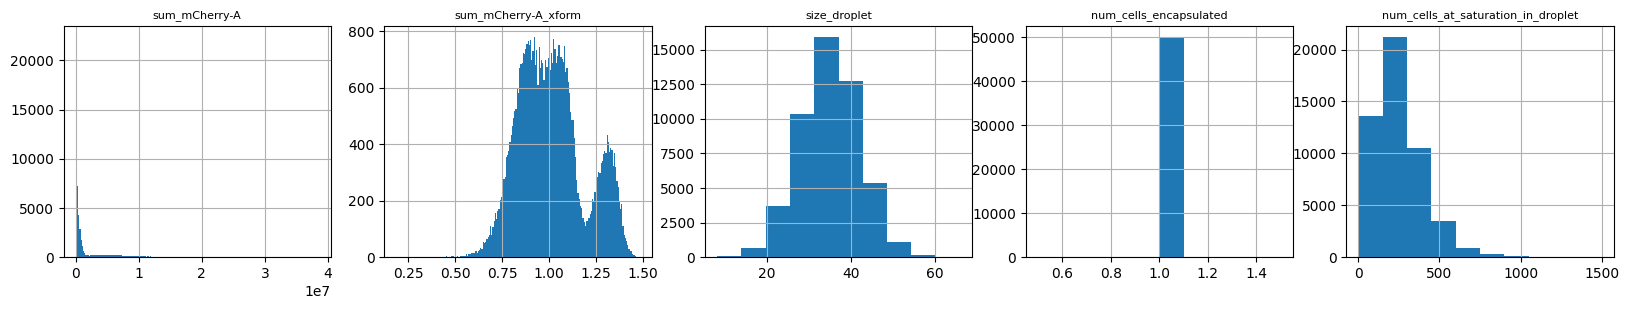

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0112 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.2,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 4239122.07, width: 385368.37, # strains present: 3, # events: 6360
peak_x: 5395227.18, width: 385368.37, # strains present: 3, # events: 5171
peak_x: 6551332.29, width: 385368.37, # strains present: 3, # events: 4065
quantile 0.99: 14794928.41000001, width: 23741978.58999999, # strains present: 3, # events: 500


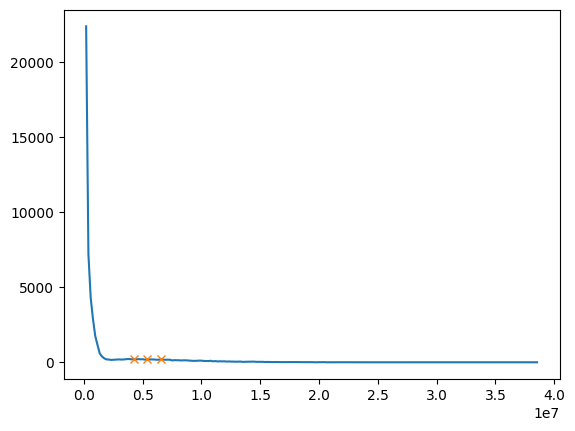

peak_x: 0.65233741421431, width: 0.012958322905957685, # strains present: 12, # events: 49606
peak_x: 0.7171290287440985, width: 0.012958322905957685, # strains present: 12, # events: 48624
peak_x: 0.8337539348977175, width: 0.012958322905957685, # strains present: 12, # events: 41980
peak_x: 0.9244621952394214, width: 0.012958322905957685, # strains present: 12, # events: 31836
peak_x: 1.0281287784870827, width: 0.012958322905957685, # strains present: 11, # events: 20741
peak_x: 1.09939955446985, width: 0.012958322905957685, # strains present: 9, # events: 13045
peak_x: 1.2354619449824058, width: 0.012958322905957685, # strains present: 4, # events: 7657
peak_x: 1.313211882418152, width: 0.012958322905957685, # strains present: 3, # events: 3673
peak_x: 1.390961819853898, width: 0.012958322905957685, # strains present: 3, # events: 345
quantile 0.99: 1.3892776395223532, width: 0.09239244067324859, # strains present: 3, # events: 500


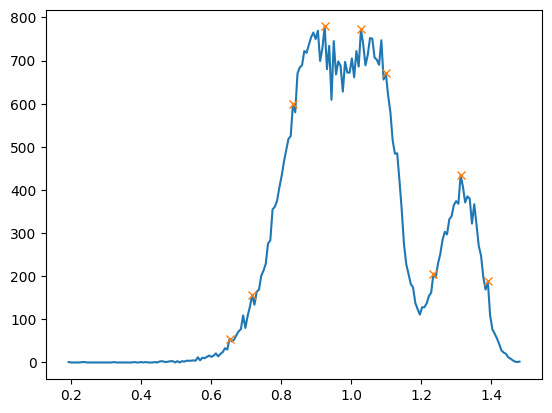

In [ ]:
df = ret_dcds_0112['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=5,
    height=200,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.1.3) ~droplet_size, scale=0.3

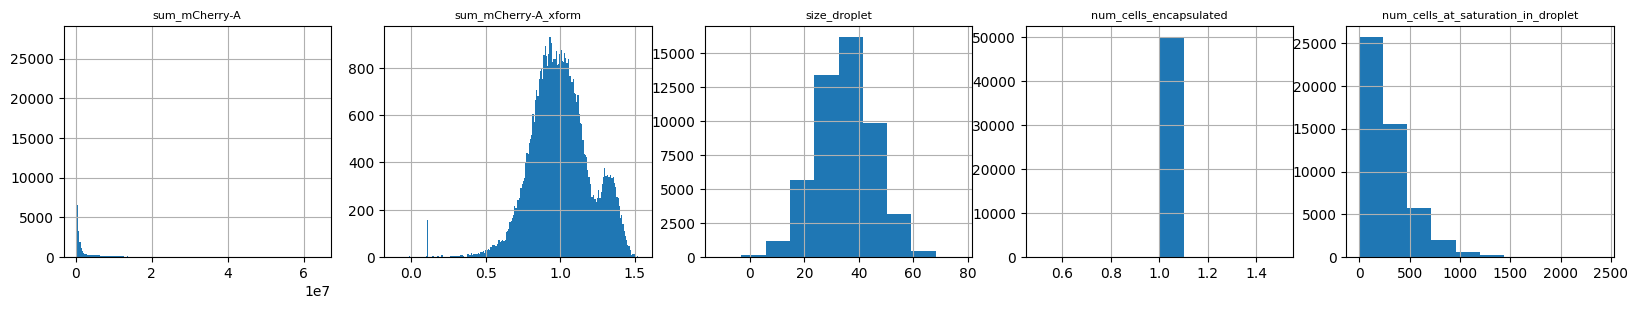

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0113 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.3,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 3839551.0200000005, width: 639973.17, # strains present: 7, # events: 6049
peak_x: 7039416.87, width: 639973.17, # strains present: 3, # events: 3829
peak_x: 10879255.89, width: 639973.17, # strains present: 3, # events: 2159
peak_x: 14399108.325000001, width: 639973.17, # strains present: 3, # events: 1252
quantile 0.99: 20581063.980000045, width: 43415965.01999995, # strains present: 3, # events: 500


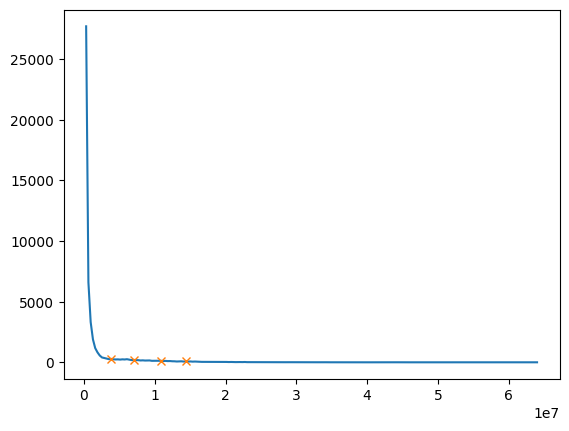

peak_x: 0.11321195130926948, width: 0.016292069050574273, # strains present: 12, # events: 49824
peak_x: 0.5938279883012105, width: 0.016292069050574273, # strains present: 12, # events: 48871
peak_x: 0.6997264371299432, width: 0.016292069050574273, # strains present: 12, # events: 47189
peak_x: 0.8463550585851118, width: 0.016292069050574273, # strains present: 12, # events: 39205
peak_x: 0.9359614383632704, width: 0.016292069050574273, # strains present: 12, # events: 30021
peak_x: 1.033713852666716, width: 0.016292069050574273, # strains present: 12, # events: 19929
peak_x: 1.1233202324448746, width: 0.016292069050574273, # strains present: 10, # events: 11914
peak_x: 1.3025329920011914, width: 0.016292069050574273, # strains present: 3, # events: 4305
peak_x: 1.4165774753552114, width: 0.016292069050574273, # strains present: 3, # events: 444
quantile 0.99: 1.4211344979032705, width: 0.10948746080596061, # strains present: 3, # events: 500


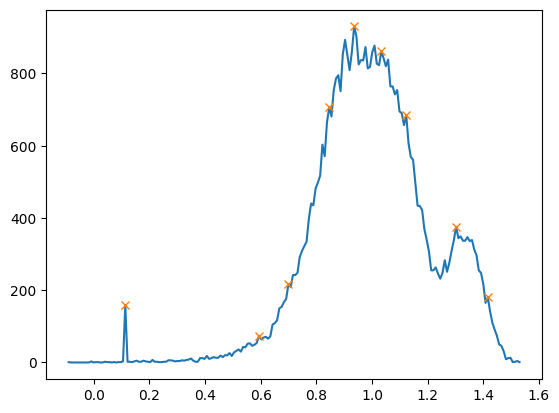

In [ ]:
df = ret_dcds_0113['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.2.1) ~cell encapsulation rate=0.1

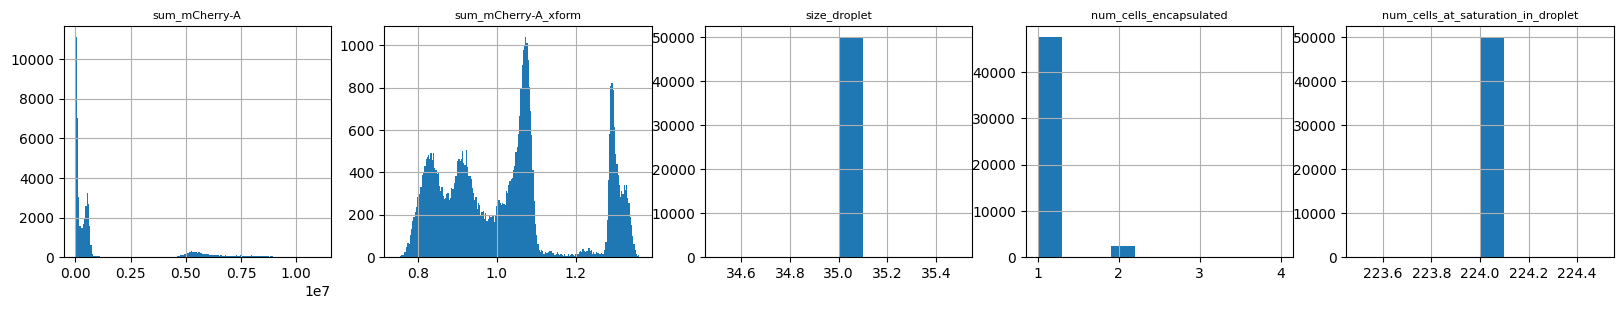

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0121 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 538456.5, width: 115813.0, # strains present: 12, # events: 14556
peak_x: 4649818.0, width: 115813.0, # strains present: 7, # events: 8947
peak_x: 5344696.0, width: 115813.0, # strains present: 6, # events: 6479
peak_x: 5981667.5, width: 115813.0, # strains present: 3, # events: 4176
peak_x: 6908171.5, width: 115813.0, # strains present: 3, # events: 2560
peak_x: 7718862.5, width: 115813.0, # strains present: 3, # events: 1464
peak_x: 8413740.5, width: 115813.0, # strains present: 1, # events: 658
quantile 0.99: 8663962.490000006, width: 2934635.509999994, # strains present: 1, # events: 501


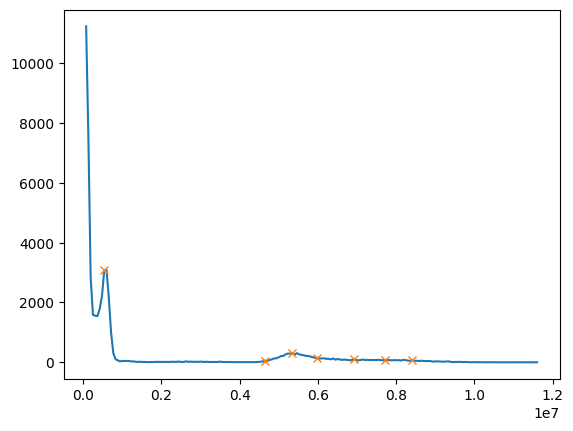

peak_x: 0.8282778683775717, width: 0.006286655508398492, # strains present: 12, # events: 46882
peak_x: 0.8817144401989588, width: 0.006286655508398492, # strains present: 12, # events: 40527
peak_x: 0.9131477177409513, width: 0.006286655508398492, # strains present: 12, # events: 36010
peak_x: 0.9508676507913423, width: 0.006286655508398492, # strains present: 12, # events: 31411
peak_x: 1.0043042226127294, width: 0.006286655508398492, # strains present: 12, # events: 27491
peak_x: 1.0451674834173197, width: 0.006286655508398492, # strains present: 12, # events: 22834
peak_x: 1.076600760959312, width: 0.006286655508398492, # strains present: 12, # events: 14428
peak_x: 1.2934903759990601, width: 0.006286655508398492, # strains present: 6, # events: 5298
peak_x: 1.328066981295252, width: 0.006286655508398492, # strains present: 2, # events: 1061
quantile 0.99: 1.3376335076017032, width: 0.028153406743939513, # strains present: 1, # events: 501


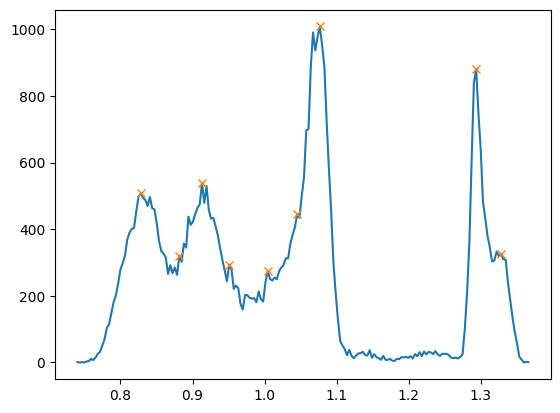

In [ ]:
df = ret_dcds_0121['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.2.2) ~cell encapsualtion rate=0.5

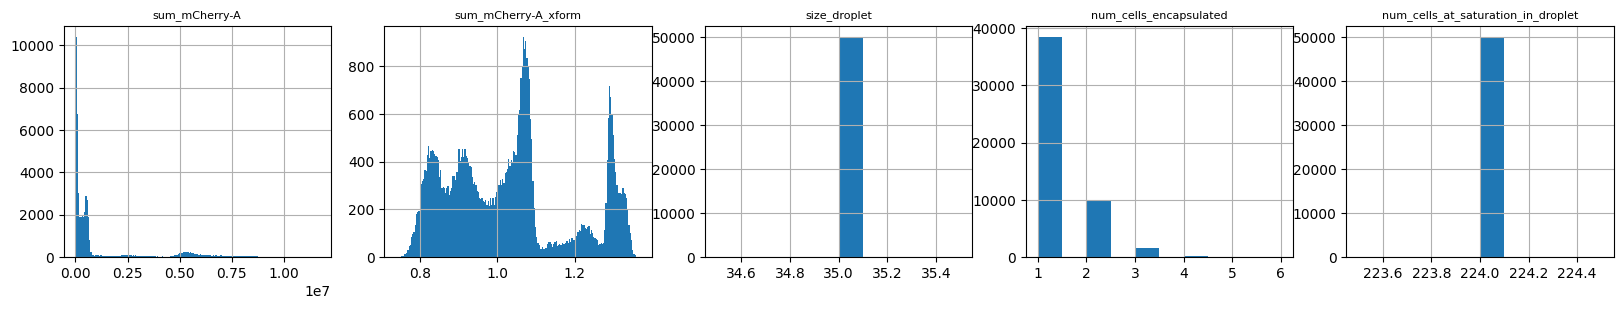

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0122 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=0.5,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 541984.655, width: 116492.59, # strains present: 12, # events: 19865
peak_x: 1124447.605, width: 116492.59, # strains present: 12, # events: 15483
peak_x: 1823403.145, width: 116492.59, # strains present: 12, # events: 13460
peak_x: 2638851.275, width: 116492.59, # strains present: 12, # events: 10972
peak_x: 3221314.225, width: 116492.59, # strains present: 12, # events: 9496
peak_x: 5318180.845, width: 116492.59, # strains present: 6, # events: 5761
peak_x: 6017136.385, width: 116492.59, # strains present: 5, # events: 3581
peak_x: 6657845.63, width: 116492.59, # strains present: 3, # events: 2543
peak_x: 7473293.76, width: 116492.59, # strains present: 3, # events: 1534
peak_x: 8288741.89, width: 116492.59, # strains present: 2, # events: 644
quantile 0.99: 8512244.750000004, width: 3154782.2499999963, # strains present: 2, # events: 514


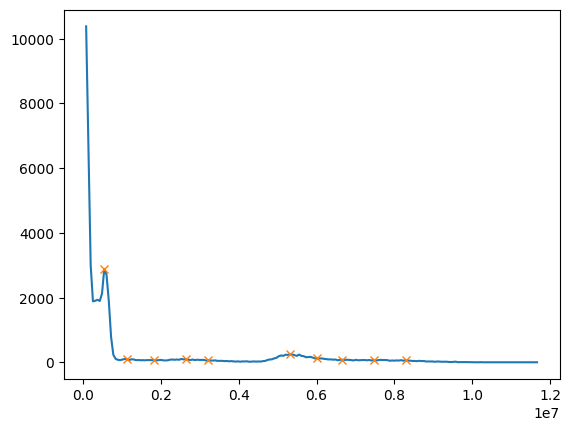

peak_x: 0.8243185911680226, width: 0.006266312614247608, # strains present: 12, # events: 58813
peak_x: 0.8556501542392607, width: 0.006266312614247608, # strains present: 12, # events: 54180
peak_x: 0.8869817173104988, width: 0.006266312614247608, # strains present: 12, # events: 50633
peak_x: 0.9183132803817368, width: 0.006266312614247608, # strains present: 12, # events: 45927
peak_x: 0.96217746868147, width: 0.006266312614247608, # strains present: 12, # events: 40280
peak_x: 0.9997753443669557, width: 0.006266312614247608, # strains present: 12, # events: 35917
peak_x: 1.0311069074381938, width: 0.006266312614247608, # strains present: 12, # events: 30930
peak_x: 1.0687047831236793, width: 0.006266312614247608, # strains present: 12, # events: 22289
peak_x: 1.1533000034160221, width: 0.006266312614247608, # strains present: 12, # events: 15019
peak_x: 1.187764722794384, width: 0.006266312614247608, # strains present: 12, # events: 13436
peak_x: 1.219096285865622, width: 0.0062663

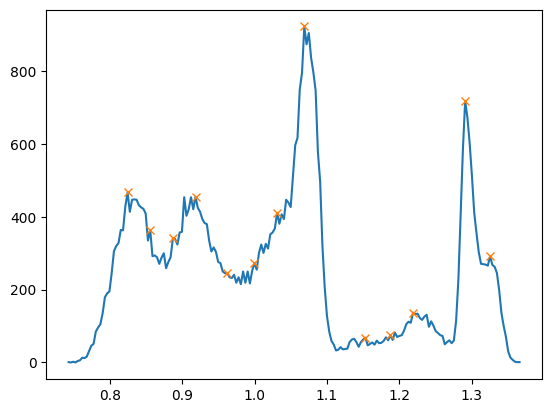

In [ ]:
df = ret_dcds_0122['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.2.3)  ~cell encapsulation rate=1

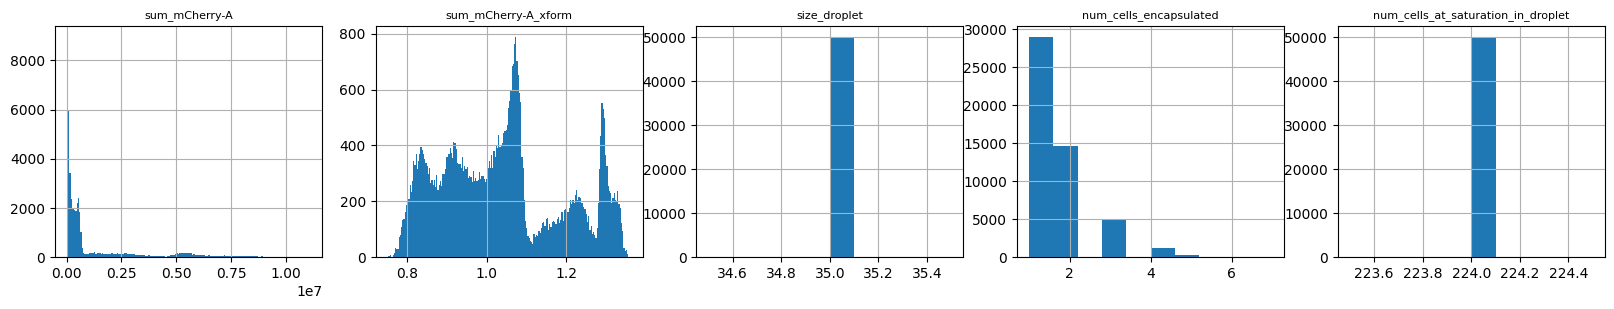

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_0123 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 573731.7, width: 110778.34, # strains present: 12, # events: 27680
peak_x: 1293790.91, width: 110778.34, # strains present: 12, # events: 21263
peak_x: 2124628.46, width: 110778.34, # strains present: 12, # events: 15449
peak_x: 2678520.16, width: 110778.34, # strains present: 12, # events: 12093
peak_x: 3398579.37, width: 110778.34, # strains present: 12, # events: 8833
peak_x: 3952471.07, width: 110778.34, # strains present: 11, # events: 7493
peak_x: 5281811.149999999, width: 110778.34, # strains present: 9, # events: 4991
peak_x: 5835702.85, width: 110778.34, # strains present: 7, # events: 3361
peak_x: 6555762.06, width: 110778.34, # strains present: 3, # events: 2220
peak_x: 7220432.1, width: 110778.34, # strains present: 3, # events: 1480
peak_x: 8106658.819999999, width: 110778.34, # strains present: 2, # events: 639
quantile 0.99: 8331530.740000001, width: 2766143.259999999, # strains present: 2, # events: 516


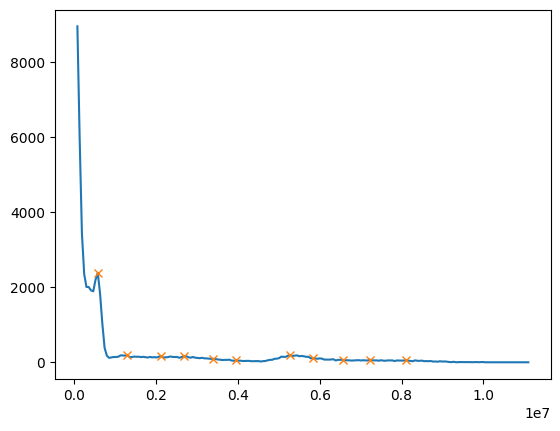

peak_x: 0.8359794783889969, width: 0.006111007085959841, # strains present: 12, # events: 73224
peak_x: 0.8757010244477358, width: 0.006111007085959841, # strains present: 12, # events: 67878
peak_x: 0.9184780740494547, width: 0.006111007085959841, # strains present: 12, # events: 61510
peak_x: 0.9520886130222338, width: 0.006111007085959841, # strains present: 12, # events: 55729
peak_x: 0.982643648452033, width: 0.006111007085959841, # strains present: 12, # events: 50364
peak_x: 1.0315317051397117, width: 0.006111007085959841, # strains present: 12, # events: 40446
peak_x: 1.0743087547414305, width: 0.006111007085959841, # strains present: 12, # events: 29371
peak_x: 1.1201413078861293, width: 0.006111007085959841, # strains present: 12, # events: 24647
peak_x: 1.1537518468589085, width: 0.006111007085959841, # strains present: 12, # events: 21407
peak_x: 1.1904178893746675, width: 0.006111007085959841, # strains present: 12, # events: 17038
peak_x: 1.2270839318904265, width: 0.0061

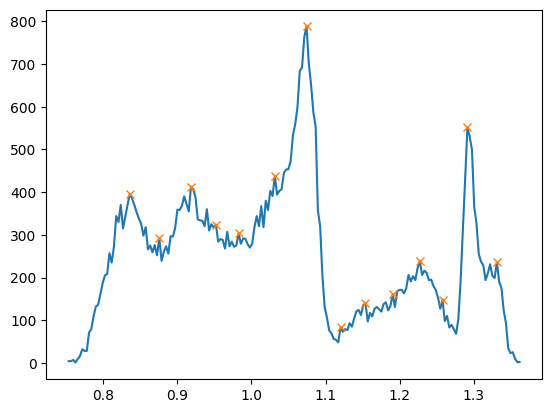

In [ ]:
df = ret_dcds_0123['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.12.1) ~droplet_size, scale=0.2, ~cell encapsualtion rate=0.5

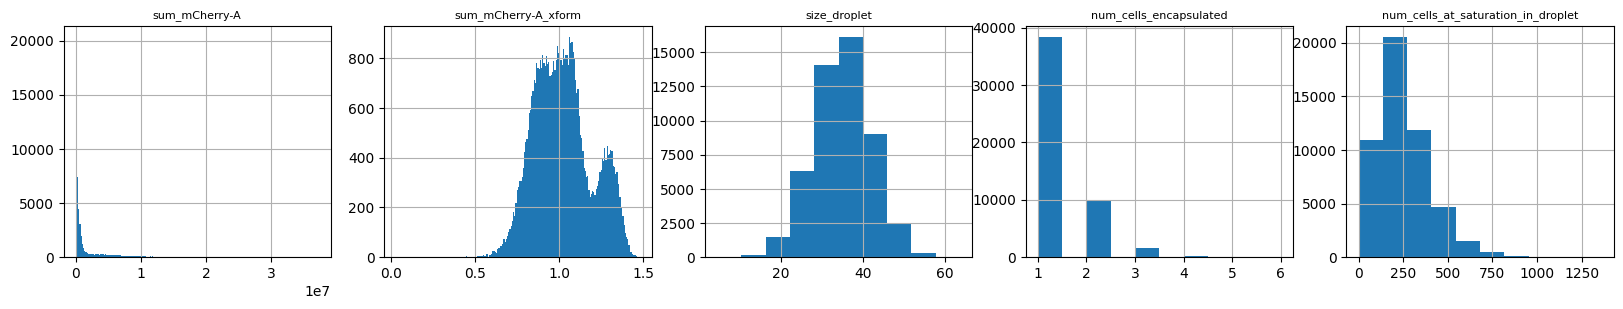

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_01_12_1 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.2,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=0.5,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 2426530.5700000003, width: 373323.78, # strains present: 12, # events: 10433
peak_x: 4666473.25, width: 373323.78, # strains present: 12, # events: 6051
peak_x: 6533092.15, width: 373323.78, # strains present: 12, # events: 3777
peak_x: 9706344.280000001, width: 373323.78, # strains present: 11, # events: 1676
peak_x: 11572963.180000002, width: 373323.78, # strains present: 9, # events: 1039
quantile 0.99: 14180413.960000016, width: 23151890.039999984, # strains present: 5, # events: 530


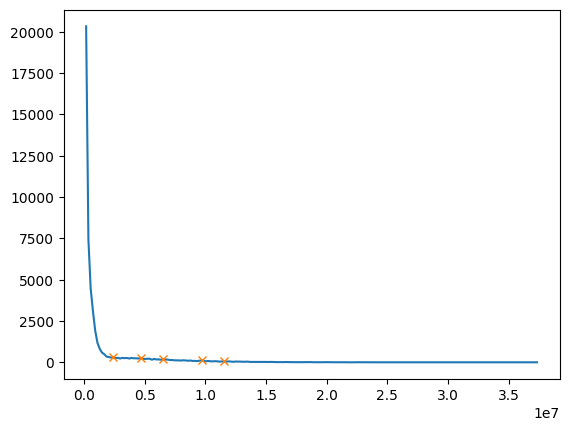

peak_x: 0.7338800414167704, width: 0.0144606820844386, # strains present: 12, # events: 62070
peak_x: 0.9074082264300336, width: 0.0144606820844386, # strains present: 12, # events: 46371
peak_x: 0.9941723189366651, width: 0.0144606820844386, # strains present: 12, # events: 34390
peak_x: 1.066475729358858, width: 0.0144606820844386, # strains present: 12, # events: 23752
peak_x: 1.1749308449921476, width: 0.0144606820844386, # strains present: 12, # events: 12876
peak_x: 1.2906163016676564, width: 0.0144606820844386, # strains present: 12, # events: 4844
peak_x: 1.3701500531320687, width: 0.0144606820844386, # strains present: 7, # events: 713
quantile 0.99: 1.3851833951404278, width: 0.09342177362493032, # strains present: 5, # events: 530


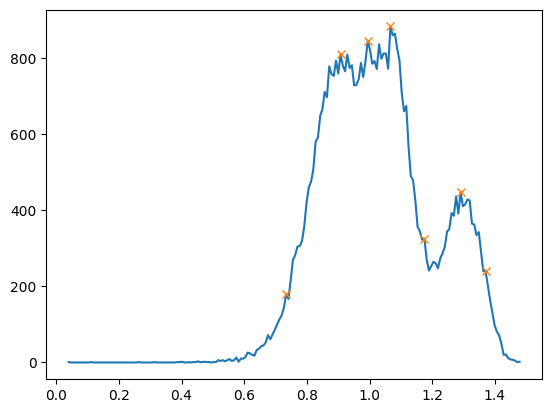

In [ ]:
df = ret_dcds_01_12_1['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.12.2) ~droplet_size, scale=0.1, ~cell encapsualtion rate=0.1

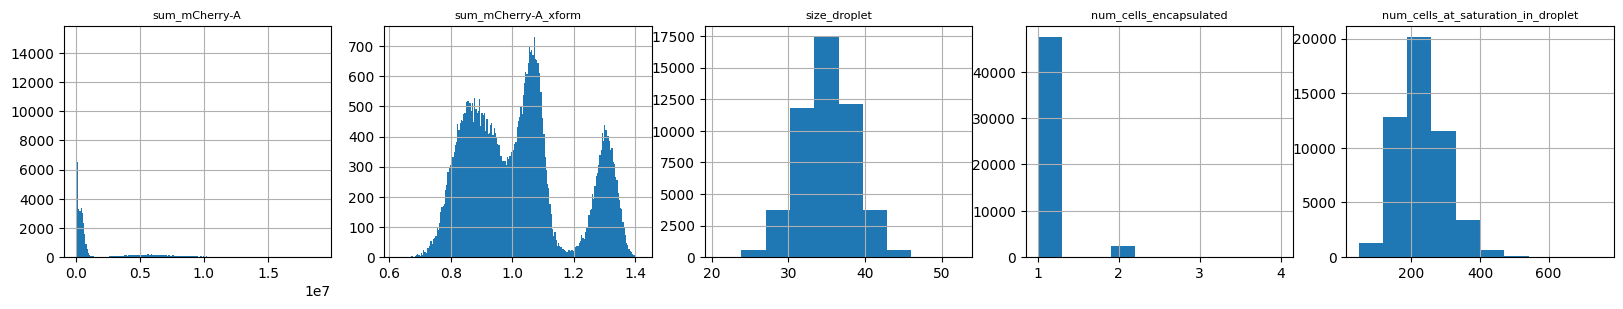

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_01_12_2 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.1,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 479008.85, width: 189460.74, # strains present: 12, # events: 16472
peak_x: 2752537.73, width: 189460.74, # strains present: 12, # events: 9266
peak_x: 3984032.54, width: 189460.74, # strains present: 12, # events: 7969
peak_x: 5026066.609999999, width: 189460.74, # strains present: 10, # events: 6337
peak_x: 5973370.31, width: 189460.74, # strains present: 6, # events: 4641
peak_x: 6920674.01, width: 189460.74, # strains present: 5, # events: 3185
peak_x: 8057438.449999999, width: 189460.74, # strains present: 3, # events: 1909
peak_x: 9004742.15, width: 189460.74, # strains present: 3, # events: 1184
quantile 0.99: 10568336.760000011, width: 8383094.239999989, # strains present: 3, # events: 505


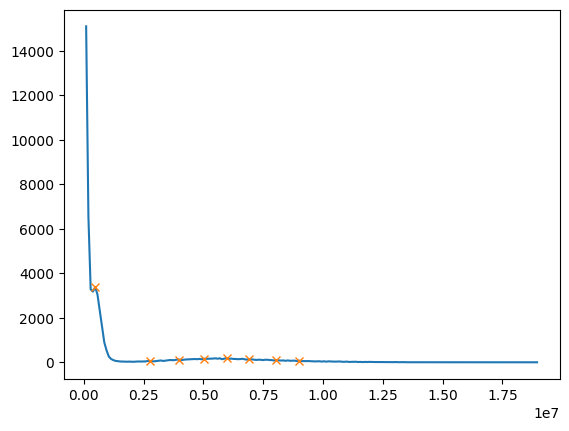

peak_x: 0.7571623897669099, width: 0.007903744243085367, # strains present: 12, # events: 51879
peak_x: 0.8361998321977635, width: 0.007903744243085367, # strains present: 12, # events: 45639
peak_x: 0.879670425534733, width: 0.007903744243085367, # strains present: 12, # events: 39988
peak_x: 0.9191891467501598, width: 0.007903744243085367, # strains present: 12, # events: 35154
peak_x: 0.9666116122086721, width: 0.007903744243085367, # strains present: 12, # events: 30213
peak_x: 1.029841566153355, width: 0.007903744243085367, # strains present: 12, # events: 23615
peak_x: 1.0733121594903245, width: 0.007903744243085367, # strains present: 12, # events: 16205
peak_x: 1.1404939855565501, width: 0.007903744243085367, # strains present: 12, # events: 10435
peak_x: 1.2630020213243733, width: 0.007903744243085367, # strains present: 12, # events: 7855
peak_x: 1.3025207425398002, width: 0.007903744243085367, # strains present: 6, # events: 4294
quantile 0.99: 1.3568093020284753, width: 0.0

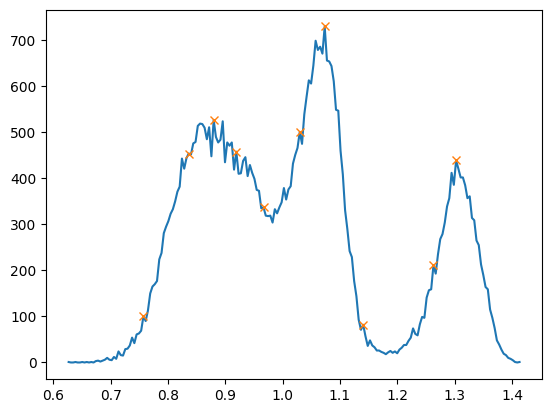

In [ ]:
df = ret_dcds_01_12_2['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

#### (1.12.3) ~droplet_size, scale=0.01, ~cell encapsualtion rate=0.1

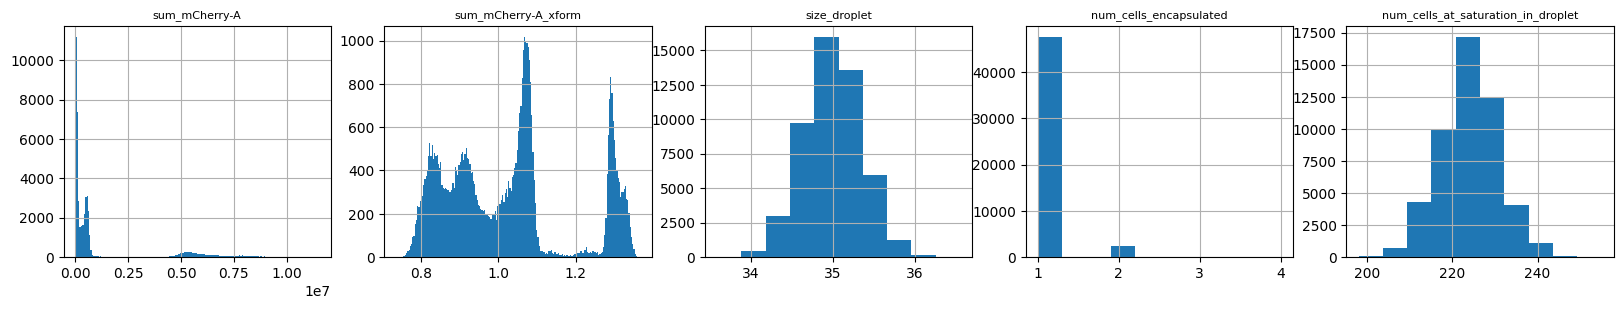

In [ ]:
df = dfc_wz
colname_f1='mCherry-A'
colname_f1_xform_logicle = 'xform_logicle_{}'.format(colname_f1)

ret_dcds_01_12_3 = dsorter.culture_sort(
    df=df, 
    n_rounds=50000,
    colname_f1=colname_f1,
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0.01,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

peak_x: 591873.6, width: 114928.72, # strains present: 12, # events: 12370
peak_x: 5418879.84, width: 114928.72, # strains present: 3, # events: 6009
peak_x: 5993523.44, width: 114928.72, # strains present: 3, # events: 4094
peak_x: 6683095.76, width: 114928.72, # strains present: 3, # events: 2770
peak_x: 7257739.36, width: 114928.72, # strains present: 3, # events: 2021
peak_x: 7947311.68, width: 114928.72, # strains present: 2, # events: 1137
peak_x: 8694348.36, width: 114928.72, # strains present: 2, # events: 424
quantile 0.99: 8643570.080000004, width: 2866531.919999996, # strains present: 2, # events: 503


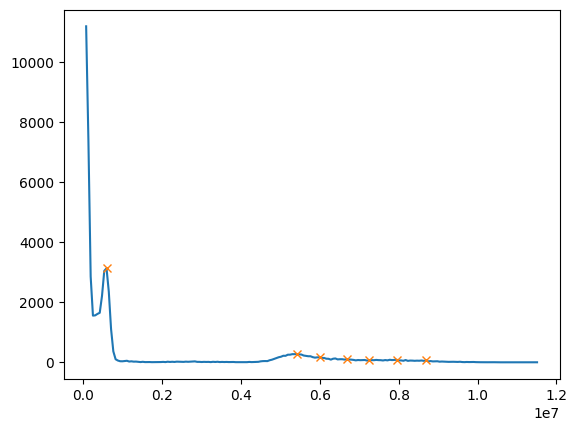

peak_x: 0.7932868101508423, width: 0.006283086967263222, # strains present: 12, # events: 51261
peak_x: 0.8247022449871585, width: 0.006283086967263222, # strains present: 12, # events: 47424
peak_x: 0.8843915711761591, width: 0.006283086967263222, # strains present: 12, # events: 40046
peak_x: 0.9189485494961068, width: 0.006283086967263222, # strains present: 12, # events: 34998
peak_x: 0.966071701750581, width: 0.006283086967263222, # strains present: 12, # events: 30309
peak_x: 1.0289025714232132, width: 0.006283086967263222, # strains present: 12, # events: 25051
peak_x: 1.0697426367104241, width: 0.006283086967263222, # strains present: 12, # events: 16594
peak_x: 1.2927922240482685, width: 0.006283086967263222, # strains present: 3, # events: 5392
peak_x: 1.330490745851848, width: 0.006283086967263222, # strains present: 2, # events: 819
quantile 0.99: 1.3374060812140403, width: 0.027641642957755286, # strains present: 2, # events: 503


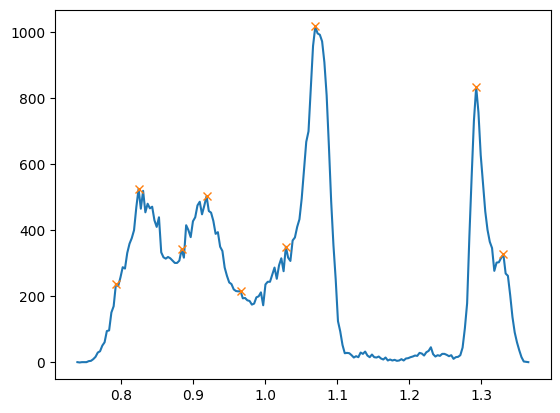

In [ ]:
df = ret_dcds_01_12_3['df']
colname_f1='sum_mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=50,
    above_quantile=0.99)

### (2) =equal abundance, =droplet_size, =num_cells_encapsulated

In [ ]:
abundances_equal = [1/len(ls_wz)]*len(ls_wz)
strain2P = dict(zip(ls_wz, abundances_equal))

tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=strain2P) #, strain2P=strain2P)
# assign random abundance to strains in the collections
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']).sort_index())

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.083333
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.083333
dtype: float64


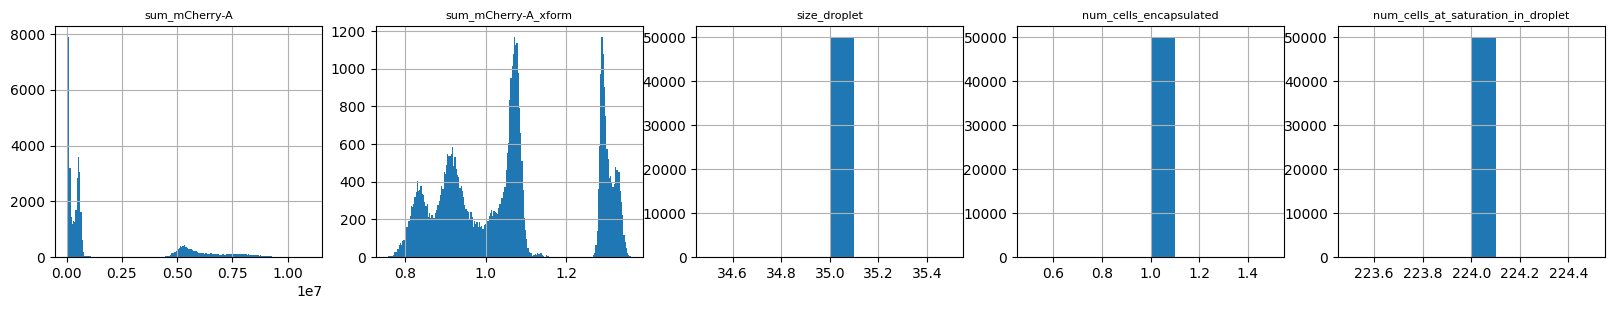

In [ ]:
ret_dcds_02 = dsorter.culture_sort(
    dfc_wz, 
    n_rounds=50000,
    colname_f1='mCherry-A',
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=np.random.normal,
    scale_droplet_size=0,
    size_left_curve_only=False,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.1,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

In [ ]:
ret_dcds_02['df'].groupby('sid')['sid'].count()

sid
(AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs,)    4097
(AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs,)    4058
(AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs,)    4139
(AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs,)    4368
(AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs,)    4339
(AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs,)    4004
(AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs,)    4047
(AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs,)    4184
(AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs,)    3908
(AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs,)    4023
(AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs,)    4628
(AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs,)    4205
Name: sid, dtype: int64

peak_x: 126649.94, width: 109161.94, # strains present: 12, # events: 31306
peak_x: 5257261.12, width: 109161.94, # strains present: 3, # events: 9091
peak_x: 5803070.82, width: 109161.94, # strains present: 3, # events: 6151
quantile 0.99: 8802422.330000008, width: 2131259.6699999925, # strains present: 1, # events: 500


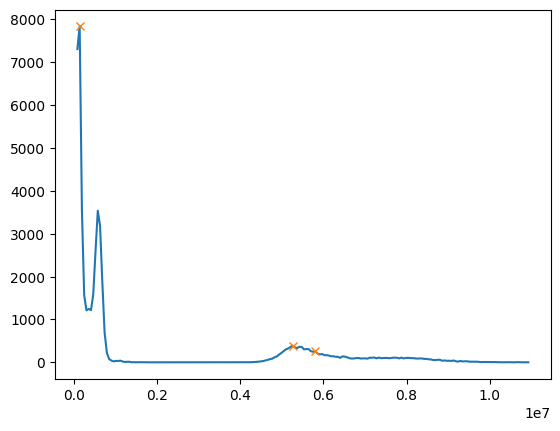

peak_x: 0.8314678370374705, width: 0.00621907591937743, # strains present: 12, # events: 46379
peak_x: 0.912315823989377, width: 0.00621907591937743, # strains present: 12, # events: 37242
peak_x: 0.9465207415459529, width: 0.00621907591937743, # strains present: 12, # events: 32475
peak_x: 1.0398068803366143, width: 0.00621907591937743, # strains present: 11, # events: 25858
peak_x: 1.0771213358528788, width: 0.00621907591937743, # strains present: 9, # events: 15997
peak_x: 1.2916794550714004, width: 0.00621907591937743, # strains present: 3, # events: 7580
peak_x: 1.328993910587665, width: 0.00621907591937743, # strains present: 2, # events: 1337
quantile 0.99: 1.3391636686988748, width: 0.020925621485677226, # strains present: 1, # events: 500


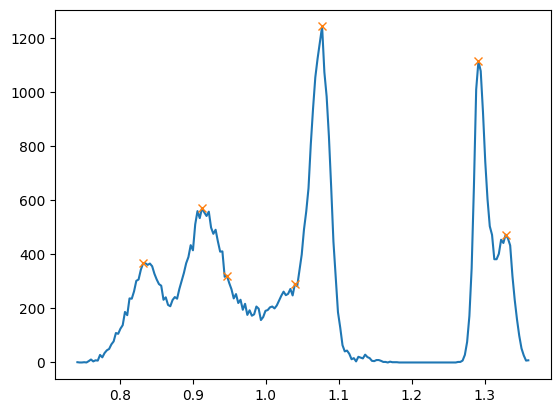

In [ ]:
df = ret_dcds_02['df']
colname_f1='sum_mCherry-A'
df["{}_logical".format(colname_f1)] = logicle_xform.apply(df[colname_f1])
colname_f1_xform = "{}_logical".format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=ret_dcds_02['df'],
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

ret_peak_1 = fld.identify_strains_at_peaks(
    df=ret_dcds_02['df'],
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

###(3) =random abundance, =droplet_size, =num_cells_encapsulated

In [ ]:
strain2P = dict(zip(ls_wz, abundances_random))
tmp_ret = fld.assign_sampling_probability(dfc_wz, strain2P=strain2P) #, strain2P=strain2P)
# assign random abundance to strains in the collections
dfc_wz = tmp_ret['df']
print(pd.Series(tmp_ret['strain2P']).sort_index())

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.041873
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.021132
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.043252
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.044895
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.104054
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.116881
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.134880
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.060166
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.030355
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.261063
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.060891
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.080559
dtype: float64


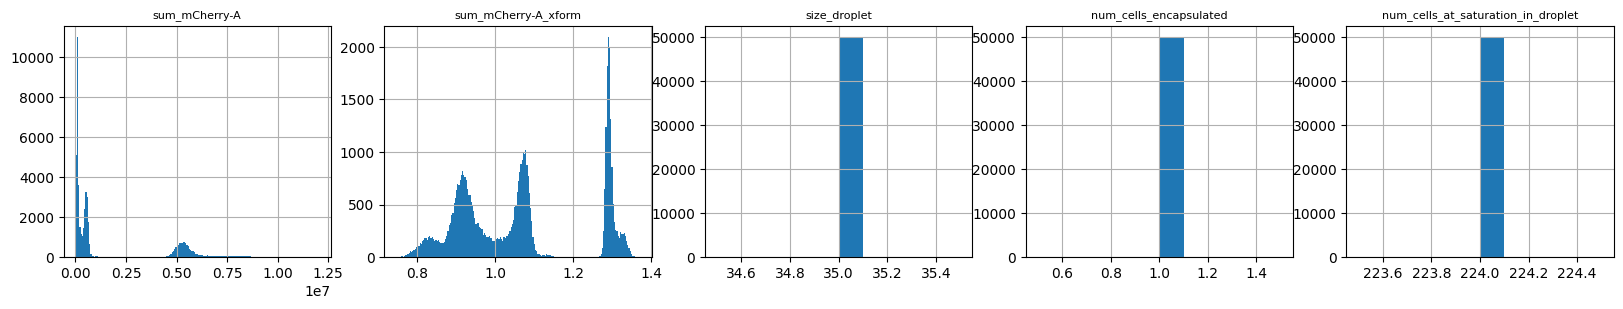

In [ ]:
colname_f1='sum_mCherry-A'
colname_f1_xform = "{}_logical".format(colname_f1)

ret_dcds_03 = dsorter.culture_sort(
    dfc_wz, 
    n_rounds=50000,
    colname_f1='mCherry-A',
    colname_strain='sid',
    colname_strainP='P_sampling_sid',
    colname_indexP='P_sampling_index',
    size_droplet=35,
    size_type='diameter',
    func_droplet_size=None, #np.random.normal,
    scale_droplet_size=0.02,
    size_left_curve_only=True,
    bins=200,
    num_cells_encapsulated=1,
    func_cells_encapsulated_per_droplet=None, #np.random.poisson,
    cell_encapsulation_rate=0.5,
    discard_empty_droplets=True,
    rng=np.random.default_rng(),
    figsize=None)

In [ ]:
ret_dcds_03['df'].groupby('sid')['sid'].count()

sid
(AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs,)    2485
(AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs,)    1342
(AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs,)    2583
(AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs,)    2741
(AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs,)    5843
(AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs,)    5786
(AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs,)    6462
(AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs,)    3511
(AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs,)    1900
(AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs,)    9160
(AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs,)    3784
(AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs,)    4403
Name: sid, dtype: int64

peak_x: 139119.39, width: 120061.39, # strains present: 11, # events: 30286
peak_x: 5361789.8549999995, width: 120061.39, # strains present: 3, # events: 6820
quantile 0.99: 8402202.21, width: 3622994.789999999, # strains present: 2, # events: 500


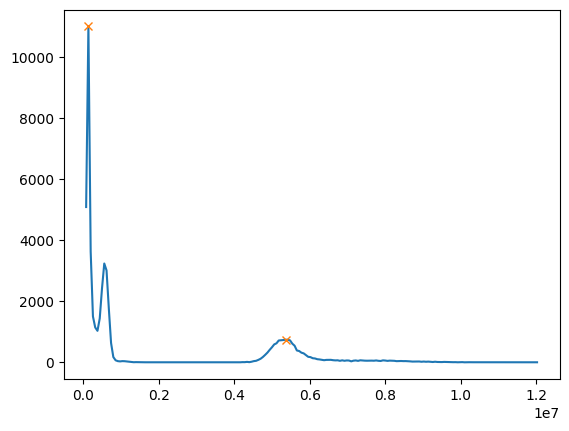

peak_x: 0.9177802114653986, width: 0.0062274850969060444, # strains present: 12, # events: 37644
peak_x: 0.9582588645952879, width: 0.0062274850969060444, # strains present: 12, # events: 31239
peak_x: 1.0796948239849558, width: 0.0062274850969060444, # strains present: 9, # events: 16555
peak_x: 1.291429317279761, width: 0.0062274850969060444, # strains present: 3, # events: 5481
quantile 0.99: 1.3346727062962227, width: 0.034600174694864094, # strains present: 2, # events: 500


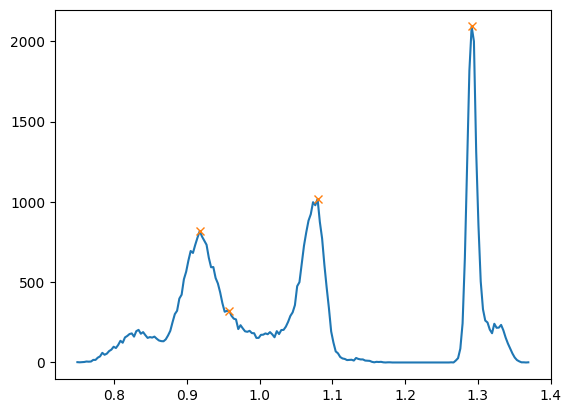

In [ ]:
df = ret_dcds_03['df']
colname_f1='sum_mCherry-A'
df["{}_logical".format(colname_f1)] = logicle_xform.apply(df[colname_f1])
colname_f1_xform = "{}_logical".format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=ret_dcds_03['df'],
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

ret_peak_1 = fld.identify_strains_at_peaks(
    df=ret_dcds_03['df'],
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

## Droplet Culture Merged + FACS

### (1)

In [ ]:
dfm = dsorter.merge_droplets(ret_dcds_01['df'], dfc_wz)

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.05856
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.06188
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.07140
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.10812
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.10238
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.06012
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.06536
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.07256
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.05730
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.05812
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.21348
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.07072
dtype: float64


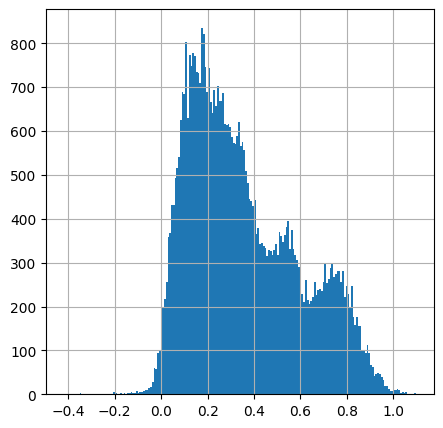

In [ ]:
colname_f1='mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)
dfm[colname_f1_xform] = logicle_xform.apply(dfm[colname_f1])


ret_dmerged_01 = flc.analyze(df=dfm,
                  n_rounds=50000,
                  colname_f1=colname_f1_xform,
                  colname_strain='sid',
                  colname_strainP='P_sampling_sid',
                  colname_indexP='P_sampling_index',
                  replace=False,
                  bins=200,
                  figsize=(5,5),
                  )
print(pd.Series(ret_dmerged_01['strain2P']).sort_index())

In [ ]:
Scount = ret_dmerged_01['df'].groupby('sid')['sid'].count()
(Scount/Scount.sum()).sort_index()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.05928
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.06280
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.07088
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.10568
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.10216
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.06254
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.06460
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.07368
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.05736
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.05618
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.21310
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.07174
Name: sid, dtype: float64

peak_x: 749.8299999999999, width: 7282.83, # strains present: 12, # events: 9065
quantile 0.99: 94478.86000000018, width: 627271.1399999998, # strains present: 7, # events: 500


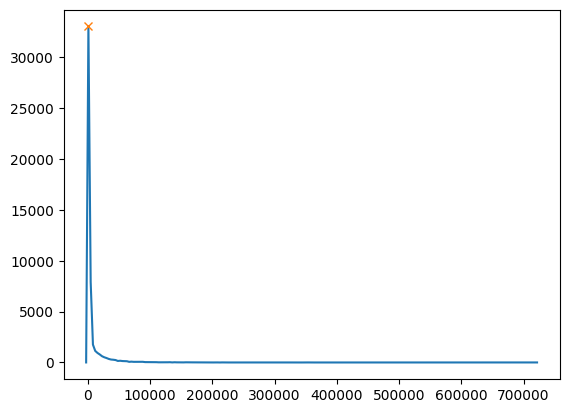

peak_x: 0.0960189741595362, width: 0.015178031598155063, # strains present: 12, # events: 43549
peak_x: 0.179498147949389, width: 0.015178031598155063, # strains present: 12, # events: 35212
peak_x: 0.2705663375383194, width: 0.015178031598155063, # strains present: 12, # events: 27030
peak_x: 0.3540455113281722, width: 0.015178031598155063, # strains present: 12, # events: 20552
peak_x: 0.4375246851180251, width: 0.015178031598155063, # strains present: 12, # events: 16036
peak_x: 0.551359922104188, width: 0.015178031598155063, # strains present: 12, # events: 10876
peak_x: 0.6272500800949633, width: 0.015178031598155063, # strains present: 12, # events: 8112
peak_x: 0.7107292538848161, width: 0.015178031598155063, # strains present: 12, # events: 5469
peak_x: 0.7866194118755915, width: 0.015178031598155063, # strains present: 11, # events: 2758
quantile 0.99: 0.9014404471660361, width: 0.1963286124717344, # strains present: 7, # events: 500


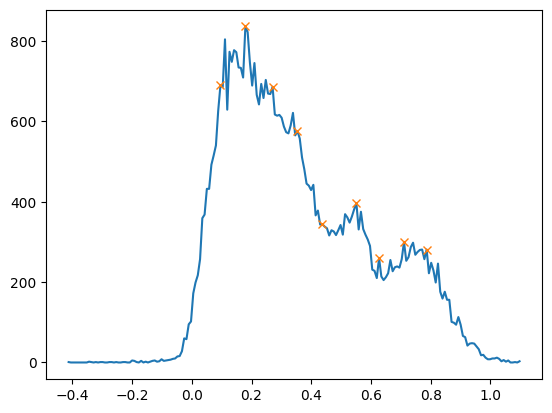

In [ ]:
df = ret_dmerged_01['df']
colname_f1='mCherry-A'
df['{}_xform'.format(colname_f1)] = logicle_xform.apply(df[colname_f1])
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

### (2)

In [ ]:
dfm = dsorter.merge_droplets(ret_dcds_02['df'], dfc_wz)

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.08194
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.08116
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.08278
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.08736
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.08678
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.08008
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.08094
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.08368
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.07816
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.08046
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.09256
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.08410
dtype: float64


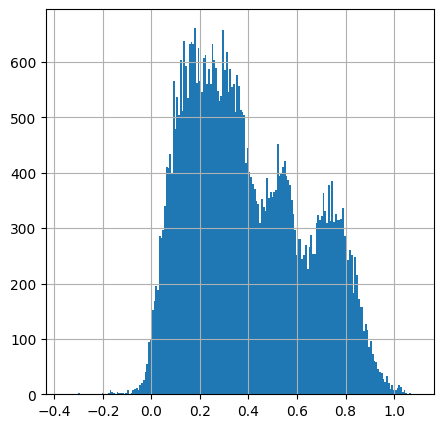

In [ ]:
colname_f1='mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)
dfm[colname_f1_xform] = logicle_xform.apply(dfm[colname_f1])

ret_dmerged_02 = flc.analyze(df=dfm,
                  n_rounds=50000,
                  colname_f1=colname_f1_xform,
                  colname_strain='sid',
                  colname_strainP='P_sampling_sid',
                  colname_indexP='P_sampling_index',
                  replace=False,
                  bins=200,
                  figsize=(5,5),
                  )
print(pd.Series(ret_dmerged_02['strain2P']).sort_index())

In [ ]:
Scount = ret_dmerged_02['df'].groupby('sid')['sid'].count()
(Scount/Scount.sum()).sort_index()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.08334
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.08038
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.08264
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.08752
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.08618
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.07924
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.08118
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.08252
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.07916
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.08002
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.09222
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.08560
Name: sid, dtype: float64

peak_x: 3121.8199999999997, width: 6722.82, # strains present: 12, # events: 10054
quantile 0.99: 104409.84000000017, width: 564271.1599999998, # strains present: 7, # events: 500


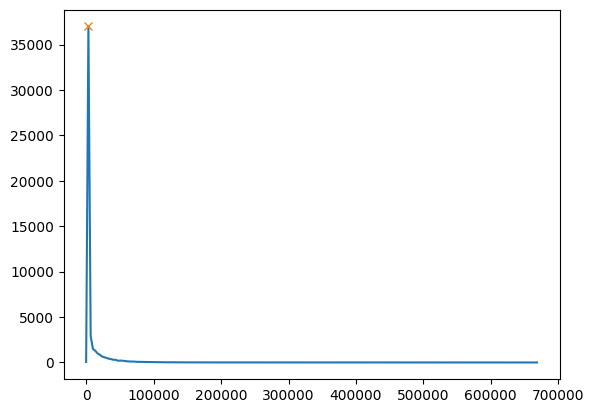

peak_x: 0.09588852007075821, width: 0.01451837609957027, # strains present: 12, # events: 44944
peak_x: 0.18299877666817987, width: 0.01451837609957027, # strains present: 12, # events: 37898
peak_x: 0.299145785464742, width: 0.01451837609957027, # strains present: 12, # events: 28550
peak_x: 0.40077441816173387, width: 0.01451837609957027, # strains present: 12, # events: 21251
peak_x: 0.5241806150080812, width: 0.01451837609957027, # strains present: 12, # events: 15037
peak_x: 0.6621051879539986, width: 0.01451837609957027, # strains present: 12, # events: 9065
peak_x: 0.7492154445514204, width: 0.01451837609957027, # strains present: 12, # events: 5153
peak_x: 0.8218073250492718, width: 0.01451837609957027, # strains present: 10, # events: 2193
quantile 0.99: 0.9110966611074254, width: 0.17930062178389639, # strains present: 7, # events: 500


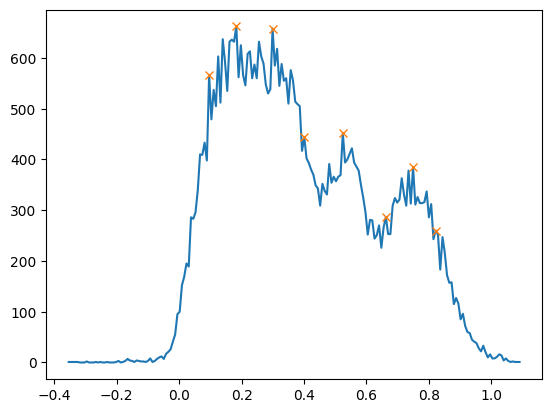

In [ ]:
df = ret_dmerged_02['df']
colname_f1='mCherry-A'
df['{}_xform'.format(colname_f1)] = logicle_xform.apply(df[colname_f1])
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

### (3)

In [ ]:
dfm = dsorter.merge_droplets(ret_dcds_03['df'], dfc_wz)

AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.04970
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.02684
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.05166
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.05482
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.11686
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.11572
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.12924
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.07022
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.03800
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.18320
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.07568
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.08806
dtype: float64


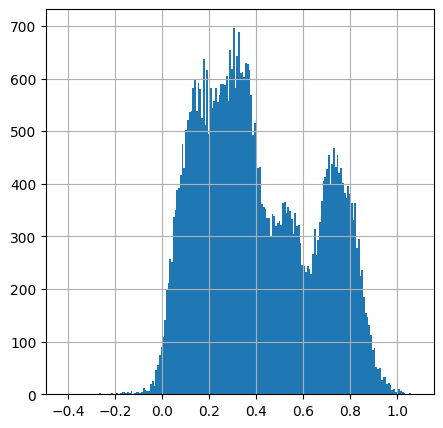

In [ ]:
colname_f1='mCherry-A'
dfm['{}_xform'.format(colname_f1)] = logicle_xform.apply(dfm[colname_f1])
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_dmerged_03 = flc.analyze(df=dfm,
                  n_rounds=50000,
                  colname_f1=colname_f1_xform,
                  colname_strain='sid',
                  colname_strainP='P_sampling_sid',
                  colname_indexP='P_sampling_index',
                  replace=False,
                  bins=200,
                  figsize=(5,5),
                  )
print(pd.Series(ret_dmerged_03['strain2P']).sort_index())

In [ ]:
Scount = ret_dmerged_03['df'].groupby('sid')['sid'].count()
(Scount/Scount.sum()).sort_index()

sid
AKH_VX_20230328_library_isolates_A1_MAIPTGZ.fcs    0.04968
AKH_VX_20230328_library_isolates_A6_MAIPTGZ.fcs    0.02734
AKH_VX_20230328_library_isolates_B3_MAIPTGZ.fcs    0.05240
AKH_VX_20230328_library_isolates_B5_MAIPTGZ.fcs    0.05326
AKH_VX_20230328_library_isolates_C3_MAIPTGZ.fcs    0.11894
AKH_VX_20230328_library_isolates_C4_MAIPTGZ.fcs    0.11418
AKH_VX_20230328_library_isolates_D1_MAIPTGZ.fcs    0.12930
AKH_VX_20230328_library_isolates_D5_MAIPTGZ.fcs    0.07046
AKH_VX_20230328_library_isolates_E4_MAIPTGZ.fcs    0.03736
AKH_VX_20230328_library_isolates_F2_MAIPTGZ.fcs    0.18494
AKH_VX_20230328_library_isolates_G2_MAIPTGZ.fcs    0.07552
AKH_VX_20230328_library_isolates_G3_MAIPTGZ.fcs    0.08662
Name: sid, dtype: float64

peak_x: 2598.535, width: 6087.6900000000005, # strains present: 12, # events: 12201
quantile 0.99: 88158.4800000001, width: 514077.5199999999, # strains present: 8, # events: 500


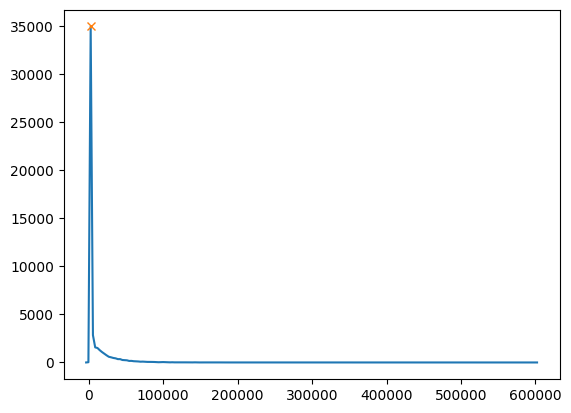

peak_x: 0.090077811062246, width: 0.015003291507058295, # strains present: 12, # events: 45620
peak_x: 0.18009756010459566, width: 0.015003291507058295, # strains present: 12, # events: 38952
peak_x: 0.30762553791459124, width: 0.015003291507058295, # strains present: 12, # events: 28968
peak_x: 0.397645286956941, width: 0.015003291507058295, # strains present: 12, # events: 21867
peak_x: 0.5251732647669365, width: 0.015003291507058295, # strains present: 12, # events: 15916
peak_x: 0.652701242576932, width: 0.015003291507058295, # strains present: 12, # events: 11024
peak_x: 0.7352193458657527, width: 0.015003291507058295, # strains present: 12, # events: 6598
peak_x: 0.8252390949081022, width: 0.015003291507058295, # strains present: 10, # events: 2020
quantile 0.99: 0.8947503822945134, width: 0.18554466823358007, # strains present: 8, # events: 500


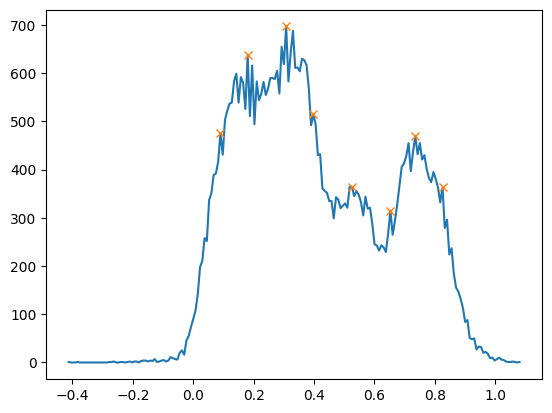

In [ ]:
df = ret_dmerged_03['df']
colname_f1='mCherry-A'
colname_f1_xform = '{}_xform'.format(colname_f1)

ret_peak = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)

ret_peak_01 = fld.identify_strains_at_peaks(
    df=df,
    colname_f1=colname_f1_xform,
    pct_width=0.01,
    bins=200,
    distance=10,
    height=250,
    above_quantile=0.99)